In [1]:
from __future__ import division
import sys, os
import numpy as np
import pandas as pd
from collections import OrderedDict
import pyfits

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.mlab as mlab
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.patches import Ellipse

/Users/KimiZ/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
from scipy.stats import lognorm, norm

# Normal

scipy.stat's lognorm.pdf is different from the one I made above.  It's missing a factor.

\begin{equation}
\text{Notation}: \ \  \mathcal{N}(\mu, \sigma^2)
\end{equation}

norm.pdf(x, loc, scale) 
\begin{equation}
= \frac{1}{\sqrt{2 \pi \sigma^2 }} \exp \left( -\frac{ (x - \mu)^2}{2 \sigma^2} \right)
\end{equation}




= lognorm.pdf(x, loc=mu, scale=sigma)

# Lognormal

scipy.stat's lognorm.pdf is different from the one I made above.  It's missing a factor.

\begin{equation}
\text{Notation}: \ \  \ln \mathcal{N}(\mu, \sigma^2)
\end{equation}

lognorm.pdf(x, s) 
\begin{equation}
\text{Scipy Version} = \frac{1}{x \ s \ \sqrt{2 \pi}} \exp \left( -\frac{1}{2} \left( \frac{\ln(x)}{s} \right)^2\right)
\end{equation}


\begin{equation}
\text{My Version} = \frac{1}{x \ \sigma \ \sqrt{2 \pi}} \exp \left( -\frac{ (\ln(x) - \mu)^2}{2 \sigma^2} \right)
\end{equation}


= lognorm.pdf(x, s=sigma, loc=mu, scale=scale)

## According to Wikipedia:
### mean, median, mode, variance

\begin{equation}
\text{mean} =  \exp \left( \frac{\mu + \sigma^2}{2} \right)
\end{equation}

\begin{equation}
\text{median} =  \exp \left(\mu \right)
\end{equation}

\begin{equation}
\text{mode} =  \exp \left(\mu - \sigma^2 \right)
\end{equation}

\begin{equation}
\text{variance} =  \left( \exp (\sigma^2) -1 \right) \exp( 2 \mu + \sigma^2)
\end{equation}



## The following is a version of the Lognormal Distribution that I wrote.  It can be used instead of the scipy.stats.lognorm verson except that instead of:
### lognorm.pdf(x, sigma, mu/scale, scale), 
## you use:
### Lognorm.pdf(x, mu, sigma)
## The scale is not needed for my functions.
# ***See my Notebook on Comparing Scipy's Lognormal Distribution to my own.***

In [3]:
class LogNormal(object):

    def __init__(self, X=None, Mu=None, Sigma=None):
        self.X = X
        self.Mu = Mu
        self.Sigma = Sigma
        
    def pdf(self, X, Mu, Sigma):
        return (np.exp(-(np.log(X) - Mu)**2 / (2 * Sigma**2)) / (X * Sigma * np.sqrt(2 * np.pi)))

    def cdf(self, X, Mu, Sigma):
        from scipy.special import erf
        return 0.5+0.5*(erf((np.log(X)-Mu)/(np.sqrt(2)*Sigma)))
    
    def mean(self, Mu, Sigma):
        return np.exp(Mu+(0.5*(Sigma**2)))
    
    def median(self, Mu, Sigma=None):
        return np.exp(Mu)
    
    def mode(self, Mu, Sigma):
        return np.exp(Mu-(Sigma**2))
    
    def var(self, Mu, Sigma):
        return (np.exp(Sigma**2)-1)*np.exp(2*Mu+(Sigma**2))
    
    def std(self, Mu, Sigma):
        return np.sqrt((np.exp(Sigma**2)-1) * np.exp(2*Mu+(Sigma**2)))
    

    def quantile(self, Probs, Mu=None, Sigma=None): # all None's have to be last
        from scipy.special import erfinv
        
        probs = [Probs]
        probs = np.asanyarray(probs)
        if not Mu:
            Mu = 0
        if not Sigma:
            Sigma = 1.0

        quant = []
        for i,prob in enumerate(probs):
            stand_norm_quantile = (0 + 1.0 * np.sqrt(2) * erfinv(2* prob-1)) # (Mu + Sigma * np.sqrt(2) * erfinv(2* Prob-1)) 
            quant.append(2.71828**(Mu+(stand_norm_quantile*Sigma)))
        return quant[0]

Lognorm = LogNormal()

### If you were to use real data and assume a lognormal distribution fits to that data, you would find the input parameters of $\mu$ and $\sigma$ from:
    mu     = np.mean(np.log(data))
    sigma  = np.std(np.log(data))
    scale  = np.exp(mu)
### The scale parameter is needed if you plan to use scipy.stats.lognorm instead of the function I've provided here.
### The difference between mine and scipy's:
    my input:       Lognorm.pdf(x, mu, sigma)
    scipy's input:  lognorm.pdf(x, sigma, mu/scale, scale)
### all other scipy lognormal commands use the same parameters in the same order as they are written here.

 
 
 
 
 
 
 --------------------------


# Plots of the Lognormal Distribution as seen on Wikipedia:
https://en.wikipedia.org/wiki/Log-normal_distribution

## Probability Density Function (PDF)

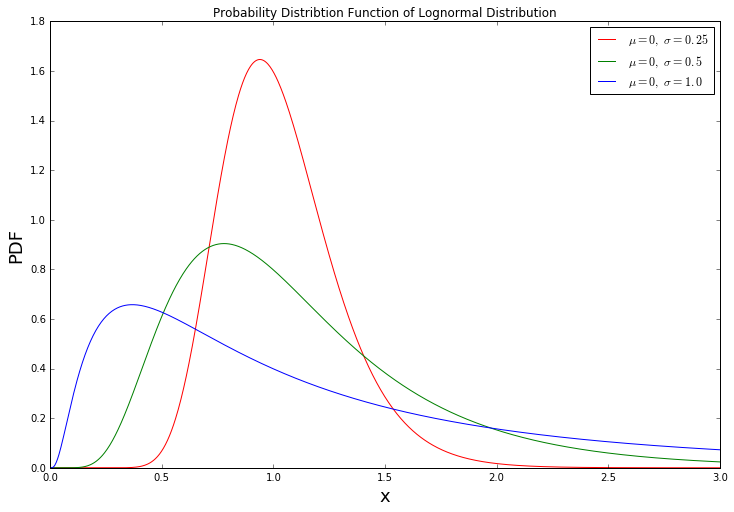

In [4]:
plt.figure(figsize=(12,8))

x = np.linspace(0, 3, 1000)

plt.plot(x, lognorm.pdf(x, loc=0, s= 0.25), 'r', label='$\mu=0, \ \sigma = 0.25$')
plt.plot(x, lognorm.pdf(x, loc=0, s= 0.5), 'g', label='$\mu=0, \ \sigma = 0.5$')
plt.plot(x, lognorm.pdf(x, loc=0, s= 1.0), 'b', label='$\mu=0, \ \sigma = 1.0$')

plt.xlim(0,3)
plt.legend(loc='best')
plt.ylabel("PDF", size=18)
plt.xlabel("x", size=18)
plt.title("Probability Distribtion Function of Lognormal Distribution")

## Some playing with the PDF

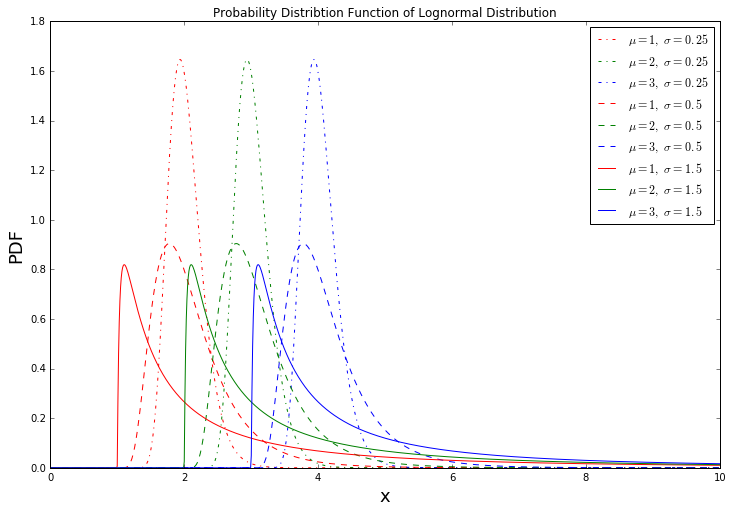

In [5]:
plt.figure(figsize=(12,8))

x = np.linspace(0, 10, 1000)

plt.plot(x, lognorm.pdf(x, loc=1, s= 0.25), 'r-.', label='$\mu=1, \ \sigma = 0.25$')
plt.plot(x, lognorm.pdf(x, loc=2, s= 0.25), 'g-.', label='$\mu=2, \ \sigma = 0.25$')
plt.plot(x, lognorm.pdf(x, loc=3, s= 0.25), 'b-.', label='$\mu=3, \ \sigma = 0.25$')

plt.plot(x, lognorm.pdf(x, loc=1, s= 0.5), 'r--', label='$\mu=1, \ \sigma = 0.5$')
plt.plot(x, lognorm.pdf(x, loc=2, s= 0.5), 'g--', label='$\mu=2, \ \sigma = 0.5$')
plt.plot(x, lognorm.pdf(x, loc=3, s= 0.5), 'b--', label='$\mu=3, \ \sigma = 0.5$')

plt.plot(x, lognorm.pdf(x, loc=1, s= 1.5), 'r-', label='$\mu=1, \ \sigma = 1.5$')
plt.plot(x, lognorm.pdf(x, loc=2, s= 1.5), 'g-', label='$\mu=2, \ \sigma = 1.5$')
plt.plot(x, lognorm.pdf(x, loc=3, s= 1.5), 'b-', label='$\mu=3, \ \sigma = 1.5$')


#plt.xlim(0,3)
plt.legend(loc='best')
plt.ylabel("PDF", size=18)
plt.xlabel("x", size=18)
plt.title("Probability Distribtion Function of Lognormal Distribution")

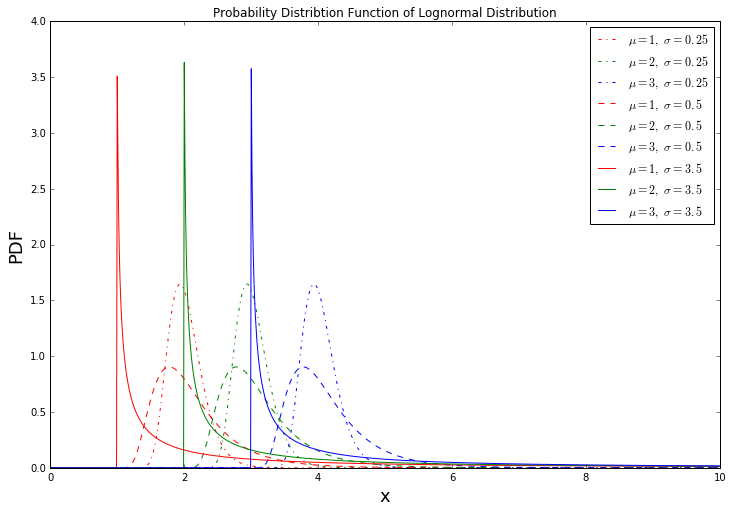

In [6]:
plt.figure(figsize=(12,8))

x = np.linspace(0, 10, 1000)

plt.plot(x, lognorm.pdf(x, loc=1, s= 0.25), 'r-.', label='$\mu=1, \ \sigma = 0.25$')
plt.plot(x, lognorm.pdf(x, loc=2, s= 0.25), 'g-.', label='$\mu=2, \ \sigma = 0.25$')
plt.plot(x, lognorm.pdf(x, loc=3, s= 0.25), 'b-.', label='$\mu=3, \ \sigma = 0.25$')

plt.plot(x, lognorm.pdf(x, loc=1, s= 0.5), 'r--', label='$\mu=1, \ \sigma = 0.5$')
plt.plot(x, lognorm.pdf(x, loc=2, s= 0.5), 'g--', label='$\mu=2, \ \sigma = 0.5$')
plt.plot(x, lognorm.pdf(x, loc=3, s= 0.5), 'b--', label='$\mu=3, \ \sigma = 0.5$')

plt.plot(x, lognorm.pdf(x, loc=1, s= 2.5), 'r-', label='$\mu=1, \ \sigma = 3.5$')
plt.plot(x, lognorm.pdf(x, loc=2, s= 2.5), 'g-', label='$\mu=2, \ \sigma = 3.5$')
plt.plot(x, lognorm.pdf(x, loc=3, s= 2.5), 'b-', label='$\mu=3, \ \sigma = 3.5$')


#plt.xlim(0,3)
plt.legend(loc='best')
plt.ylabel("PDF", size=18)
plt.xlabel("x", size=18)
plt.title("Probability Distribtion Function of Lognormal Distribution")

/Users/KimiZ/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


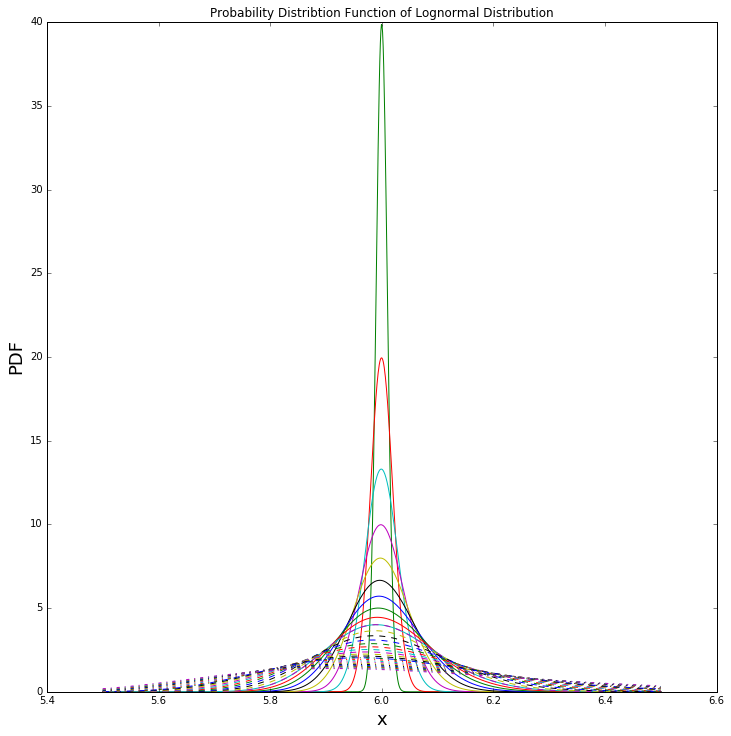

In [7]:
plt.figure(figsize=(12,12))

mu = 5

x = np.linspace(5.5, 6.5, 1000)


S_array = np.linspace(0, 0.1, 11)

for i,j in enumerate(S_array):
    plt.plot(x, lognorm.pdf(x, loc=mu, s=j), '-') #, label='$\mu=%.2f, \ \sigma = %.2f$')%(mu, j)       

    
S_array = np.linspace(0.1, 0.2, 11)
for i,j in enumerate(S_array):
    plt.plot(x, lognorm.pdf(x, loc=mu, s=j), '--')#, label='$\mu=%.2f, \ \sigma = %.2f$')%(mu, j)       

S_array = np.linspace(.2, .3, 11)
for i,j in enumerate(S_array):
    plt.plot(x, lognorm.pdf(x, loc=mu, s=j), '-.')#, label='$\mu=%.2f, \ \sigma = %.2f$')%(mu, j)       


plt.legend(loc='best')
plt.ylabel("PDF", size=18)
plt.xlabel("x", size=18)
plt.title("Probability Distribtion Function of Lognormal Distribution")

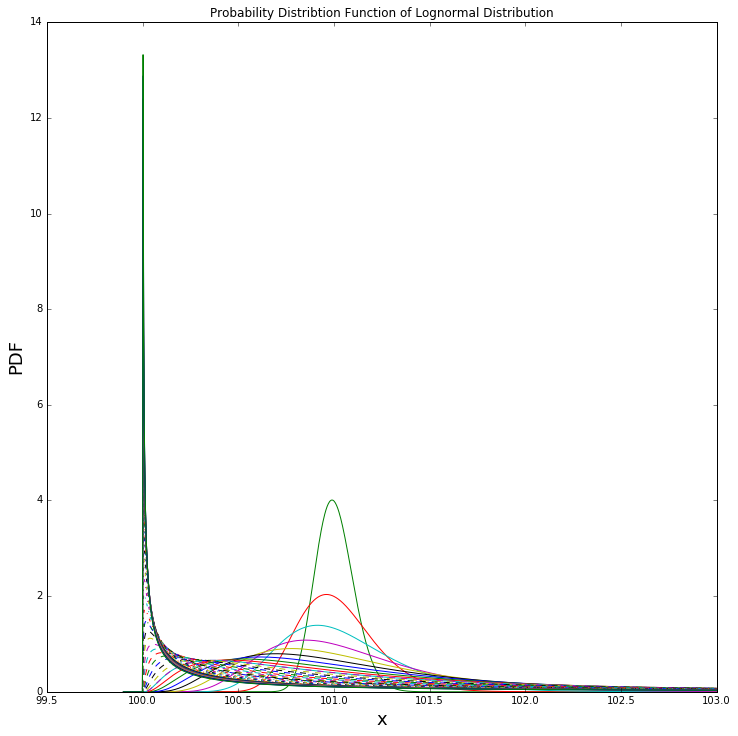

In [8]:
plt.figure(figsize=(12,12))

mu = 100

x = np.linspace(mu-.1, mu+3, 1000)

# def textloc(loc, s):
#     Xloc = lognorm.mean(loc, s)
#     Yloc = max(lognorm.pdf(loc, s))
#     return Xloc, Yloc

S_array = np.linspace(0, 1.0, 11)

for i,j in enumerate(S_array):
    plt.plot(x, lognorm.pdf(x, loc=mu, s=j), '-') #, label='$\mu=%.2f, \ \sigma = %.2f$')%(mu, j)       

    
S_array = np.linspace(1.0, 2.0, 11)
for i,j in enumerate(S_array):
    plt.plot(x, lognorm.pdf(x, loc=mu, s=j), '--')#, label='$\mu=%.2f, \ \sigma = %.2f$')%(mu, j)       

S_array = np.linspace(2.0, 3.0, 11)
for i,j in enumerate(S_array):
    plt.plot(x, lognorm.pdf(x, loc=mu, s=j), '-.')#, label='$\mu=%.2f, \ \sigma = %.2f$')%(mu, j)       

S_array = np.linspace(3.0, 4.0, 11)
for i,j in enumerate(S_array):
    plt.plot(x, lognorm.pdf(x, loc=mu, s=j), '-')#, label='$\mu=%.2f, \ \sigma = %.2f$')%(mu, j)       


#plt.xlim(9.9, 12)
#plt.ylim(0,9)
plt.legend(loc='best')
plt.ylabel("PDF", size=18)
plt.xlabel("x", size=18)
plt.title("Probability Distribtion Function of Lognormal Distribution")

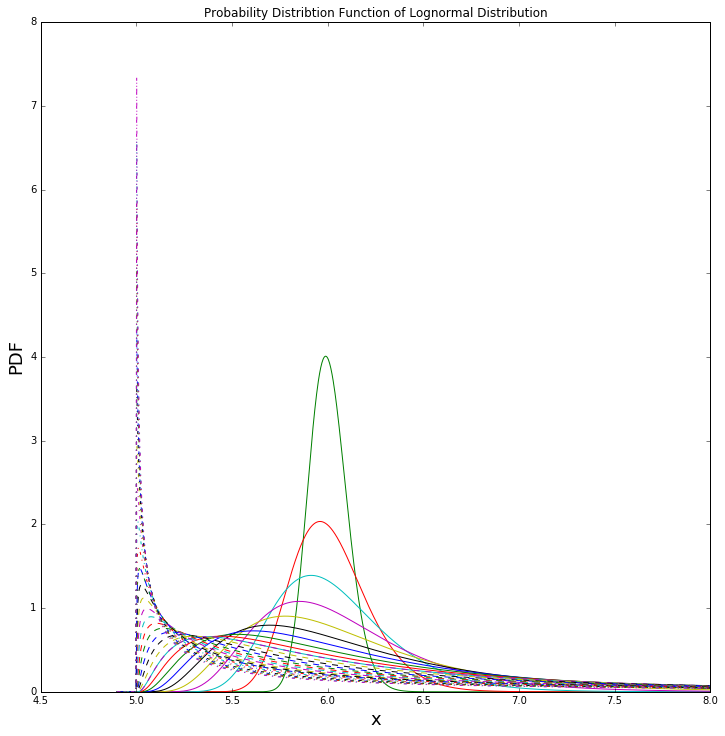

In [9]:
plt.figure(figsize=(12,12))

mu = 5

x = np.linspace(mu-.1, mu+3, 1000)

# def textloc(loc, s):
#     Xloc = lognorm.mean(loc, s)
#     Yloc = max(lognorm.pdf(loc, s))
#     return Xloc, Yloc

S_array = np.linspace(0, 1.0, 11)

for i,j in enumerate(S_array):
    plt.plot(x, lognorm.pdf(x, loc=mu, s=j), '-') #, label='$\mu=%.2f, \ \sigma = %.2f$')%(mu, j)       

    
S_array = np.linspace(1.0, 2.0, 11)
for i,j in enumerate(S_array):
    plt.plot(x, lognorm.pdf(x, loc=mu, s=j), '--')#, label='$\mu=%.2f, \ \sigma = %.2f$')%(mu, j)       

S_array = np.linspace(2.0, 3.0, 11)
for i,j in enumerate(S_array):
    plt.plot(x, lognorm.pdf(x, loc=mu, s=j), '-.')#, label='$\mu=%.2f, \ \sigma = %.2f$')%(mu, j)       


#plt.xlim(9.9, 12)
#plt.ylim(0,9)
plt.legend(loc='best')
plt.ylabel("PDF", size=18)
plt.xlabel("x", size=18)
plt.title("Probability Distribtion Function of Lognormal Distribution")

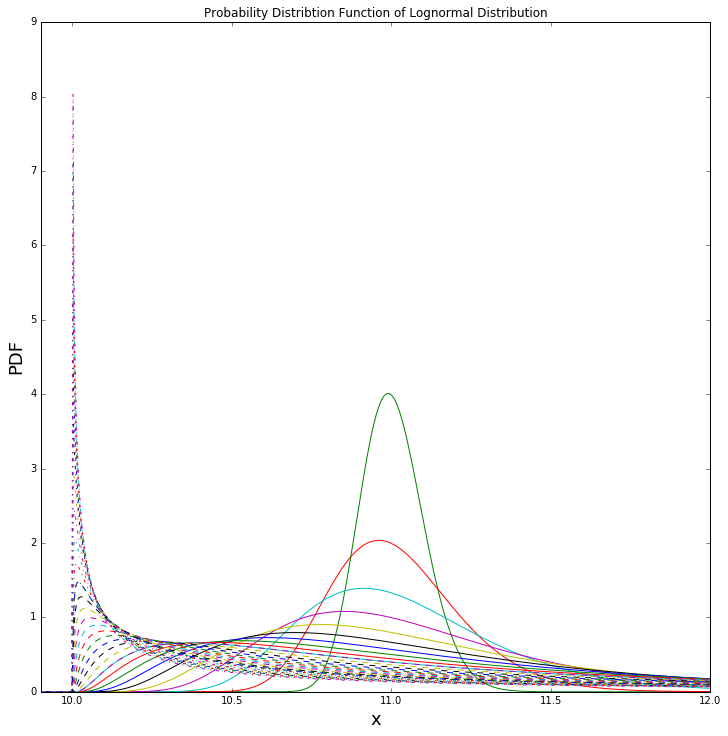

In [10]:
plt.figure(figsize=(12,12))

x = np.linspace(9.8, 13, 1000)

mu = 10
S_array = np.linspace(0, 1.0, 11)

for i,j in enumerate(S_array):
    plt.plot(x, lognorm.pdf(x, loc=mu, s=j), '-') #, label='$\mu=%.2f, \ \sigma = %.2f$')%(mu, j)       

    
S_array = np.linspace(1.0, 2.0, 11)
for i,j in enumerate(S_array):
    plt.plot(x, lognorm.pdf(x, loc=mu, s=j), '--')#, label='$\mu=%.2f, \ \sigma = %.2f$')%(mu, j)       

S_array = np.linspace(2.0, 3.0, 11)
for i,j in enumerate(S_array):
    plt.plot(x, lognorm.pdf(x, loc=mu, s=j), '-.')#, label='$\mu=%.2f, \ \sigma = %.2f$')%(mu, j)       


plt.xlim(9.9, 12)
plt.ylim(0,9)
plt.legend(loc='best')
plt.ylabel("PDF", size=18)
plt.xlabel("x", size=18)
plt.title("Probability Distribtion Function of Lognormal Distribution")

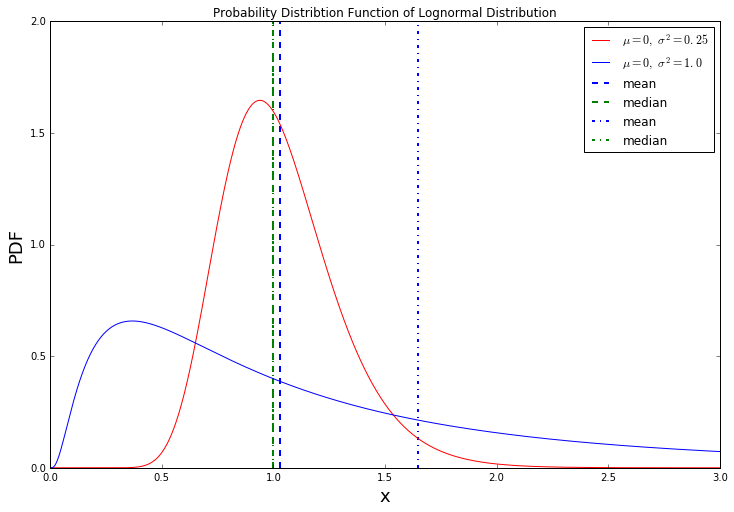

In [11]:
plt.figure(figsize=(12,8))

x = np.linspace(0, 3, 1000)

plt.plot(x, lognorm.pdf(x, loc=0, s= 0.25), 'r', label='$\mu=0, \ \sigma^2 = 0.25$')
plt.plot(x, lognorm.pdf(x, loc=0, s= 1.0), 'b', label='$\mu=0, \ \sigma^2 = 1.0$')

colors = "blue, green, red".split(", ")
labels = "mean, median, mode".split(", ")
valsA = [lognorm.mean(loc=0, s= 0.25), lognorm.median(loc=0, s= 0.25)]
valsB = [lognorm.mean(loc=0, s= 1.0), lognorm.median(loc=0, s= 1.0)]

for i,val in enumerate(valsA):
    plt.vlines(val, 0, 2, linestyle='--', lw=2, color=colors[i], label= labels[i])

for i,val in enumerate(valsB):
    plt.vlines(val, 0, 2, linestyle='-.', lw=2, color=colors[i], label= labels[i])

    
plt.xlim(0,3)
plt.legend(loc='best')
plt.ylabel("PDF", size=18)
plt.xlabel("x", size=18)
plt.title("Probability Distribtion Function of Lognormal Distribution")

## Scipy's lognorm distribution doesn't have and mode so I used my own Lognorm.pdf for this next plot.

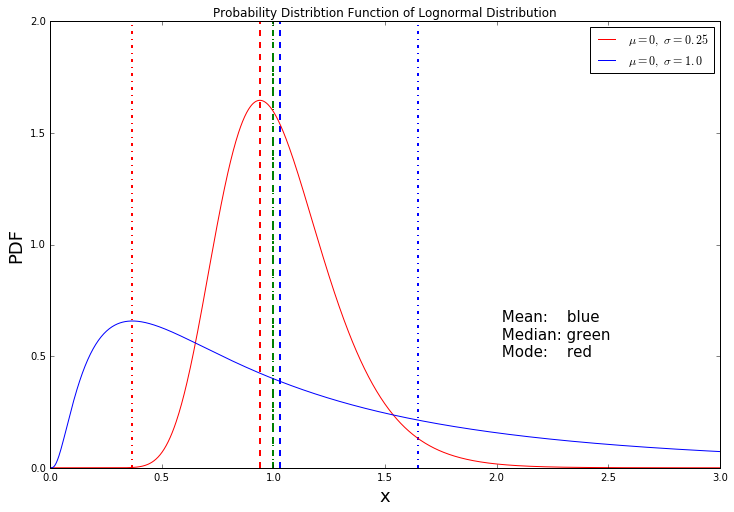

In [12]:
plt.figure(figsize=(12,8))

x = np.linspace(0, 3, 1000)

plt.plot(x, Lognorm.pdf(x, 0, 0.25), 'r', label='$\mu=0, \ \sigma = 0.25$')
plt.plot(x, Lognorm.pdf(x, 0, 1.0), 'b', label='$\mu=0, \ \sigma = 1.0$')

colors = "blue, green, red".split(", ")
labels = "mean, median, mode".split(", ")


valsA = [Lognorm.mean(0, 0.25), Lognorm.median(0, 0.25), Lognorm.mode(0, 0.25)]
valsB = [Lognorm.mean(0, 1.0), Lognorm.median(0, 1.0), Lognorm.mode(0, 1.0)]

for i,val in enumerate(valsA):
    plt.vlines(val, 0, 2, linestyle='--', lw=2, color=colors[i])

for i,val in enumerate(valsB):
    plt.vlines(val, 0, 2, linestyle='-.', lw=2, color=colors[i])


plt.xlim(0,3)
plt.text(2.0, 0.5, " Mean:    blue \n Median: green \n Mode:    red", size=15)    
plt.legend(loc='best')
plt.ylabel("PDF", size=18)
plt.xlabel("x", size=18)
plt.title("Probability Distribtion Function of Lognormal Distribution")

## Cumulative Distribution Function (CDF)


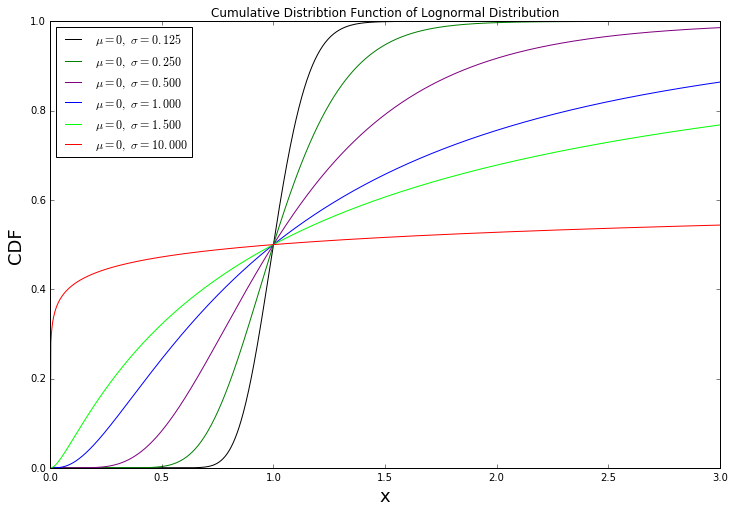

In [13]:
plt.figure(figsize=(12,8))

x = np.linspace(0, 3, 1000)

colors = "black, green, purple, blue, lime, red".split(", ")
sigmas = "0.125, 0.25, 0.5, 1.0, 1.5, 10".split(", ")

for i,sig in enumerate(sigmas):
    plt.plot(x, lognorm.cdf(x, loc=0, s= float(sig)), color= str(colors[i]), label="$\mu=0, \ \sigma = %.3f$"%float(sig))
    
#plt.plot(x, lognorm.cdf(x, loc=0, s= 0.125), 'black', label='$\mu=0, \ \sigma^2 = 0.125$')
#plt.plot(x, lognorm.cdf(x, loc=0, s= 0.5), 'g', label='$\mu=0, \ \sigma^2 = 0.5$')
#plt.plot(x, lognorm.cdf(x, loc=0, s= 1.0), 'b', label='$\mu=0, \ \sigma^2 = 1.0$')

plt.xlim(0,3)
plt.legend(loc='best')
plt.ylabel("CDF", size=18)
plt.xlabel("x", size=18)
plt.title("Cumulative Distribtion Function of Lognormal Distribution")


-----

# Creating Data from a Distribution

## I'm going to make a fake data set that is pulled from a lognormal distribution.

lognorm.rvs(sigma, mu/scale, scale, size=1000)

In [14]:
mu     = 6.3
sigma  = 0.19
scale  = np.exp(mu)

In [15]:
mysamples = lognorm.rvs(sigma, mu/scale, scale, size=10000)

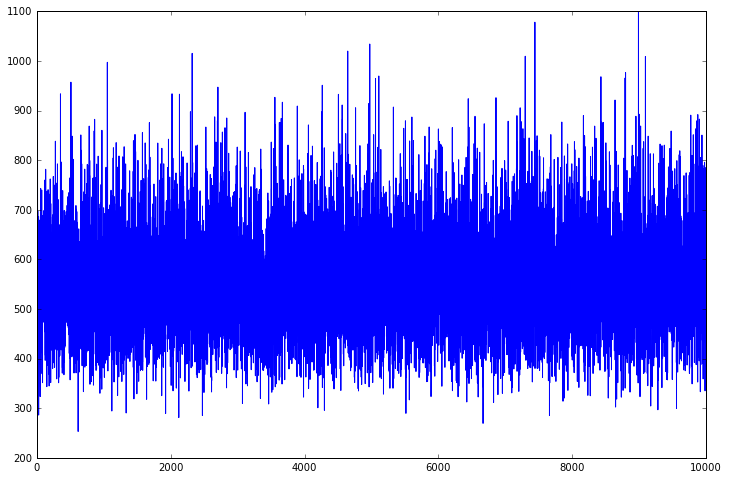

In [16]:
plt.figure(figsize=(12,8))
plt.plot(mysamples)

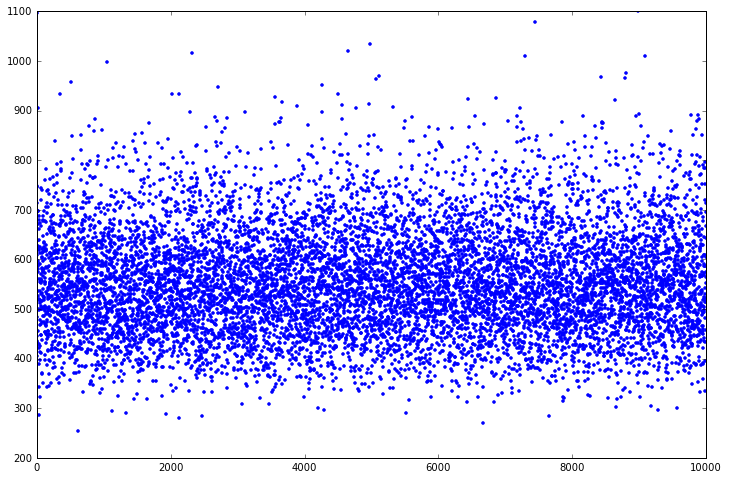

In [17]:
plt.figure(figsize=(12,8))
plt.plot(mysamples, '.')

### You can see that when you take the mysamples.mean(), mysamples.std(), mysamples.var(), or any others...
### It assumes a Gaussian (Normal) Distribution.  But we don't have a Gaussian Distribution.

In [18]:
print ""
print "Properties of the assumed Lognormal Distribution: "
print "mean:     %f"%lognorm.mean(sigma, mu/scale, scale)
print "median:   %f"%lognorm.median(sigma, mu/scale, scale)
#print "mode:     %f"%lognorm.mode(sigma, mu/scale, scale)
print "variance: %f"%lognorm.var(sigma, mu/scale, scale)
print "st dev:   %f"%lognorm.std(sigma, mu/scale, scale)
print ""
print "Properties of the sample data: "
print "mean:     %f"%mysamples.mean()
#print "median:   %f"%mysamples.median()
#print "mode:     %f"%mysamples.mode()
print "variance: %f"%mysamples.var()
print "st dev:   %f"%mysamples.std()
print ""

mu_norm = np.mean(mysamples)
sigma_norm = np.std(mysamples)

print "Properties of the assumed Normal Distribution: "
print "mean:     %f"%norm.mean(mu_norm, sigma_norm)
print "median:   %f"%norm.median(mu_norm, sigma_norm)
#print "mode:     %f"%norm.mode(mu_norm, sigma_norm)
print "variance: %f"%norm.var(mu_norm, sigma_norm)
print "st dev:   %f"%norm.std(mu_norm, sigma_norm)
print ""


Properties of the assumed Lognormal Distribution: 
mean:     554.502249
median:   544.583479
variance: 11302.078052
st dev:   106.311232

Properties of the sample data: 
mean:     555.020617
variance: 11317.707783
st dev:   106.384716

Properties of the assumed Normal Distribution: 
mean:     555.020617
median:   555.020617
variance: 11317.707783
st dev:   106.384716



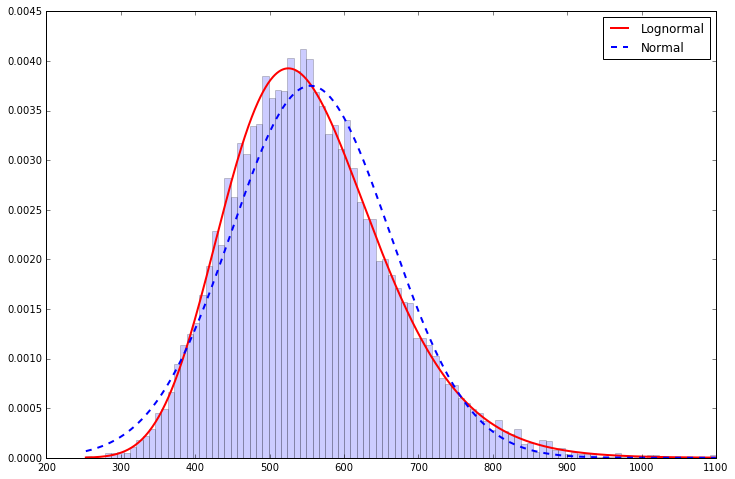

In [19]:
plt.figure(figsize=(12,8))

count, bins, ignored = plt.hist(mysamples, 100, normed=True, align='mid', alpha=0.2)

x      = np.linspace(min(bins), max(bins), 1000)
y      = lognorm.pdf(x, sigma, mu/scale, scale)
plt.plot(x, y, 'r-', lw=2, label='Lognormal')

x      = np.linspace(min(bins), max(bins), 1000)
y      = norm.pdf(x, mu_norm, sigma_norm)
plt.plot(x, y, 'b--', lw=2, label='Normal')

plt.legend(loc='best')


### Both lines are truncated because the x-data array begins at the minimum bin.
### Starting it at 200 to get a pull picture of both distributions

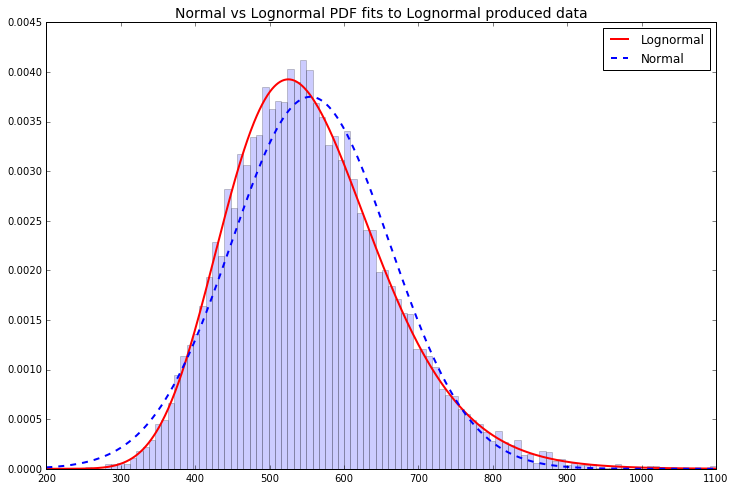

In [20]:
plt.figure(figsize=(12,8))

count, bins, ignored = plt.hist(mysamples, 100, normed=True, align='mid', alpha=0.2)

x      = np.linspace(200, max(bins), 1000)
y      = lognorm.pdf(x, sigma, mu/scale, scale)
plt.plot(x, y, 'r-', lw=2, label='Lognormal')

x      = np.linspace(200, max(bins), 1000)
y      = norm.pdf(x, mu_norm, sigma_norm)
plt.plot(x, y, 'b--', lw=2, label='Normal')

plt.legend(loc='best')
plt.title("Normal vs Lognormal PDF fits to Lognormal produced data", size=14)

## It is pretty easy to see that the Lognormal Distribution is a better fit to the data, which should make sense since it was the distribution we used to create the data.

## This idea is important for Bootstrap Resampling.  When you make synthetic data sets, you assume a distribution to be the true one and then make N number of synthetic data sets as if they were drawn for that distribution.

### Essentially, we'd make N number of "mysamples" and store them in a dataframe.


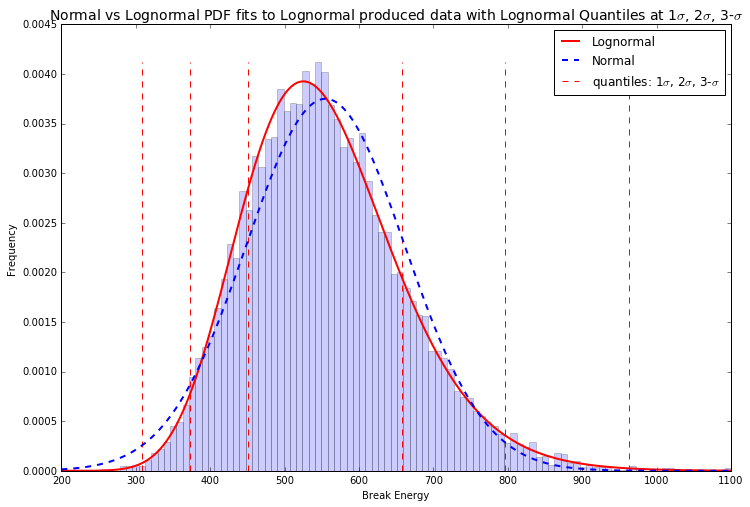

In [21]:
plt.figure(figsize=(12,8))

count, bins, ignored = plt.hist(mysamples, 100, normed=True, align='mid', alpha=0.2)

x      = np.linspace(200, max(bins), 1000)
y      = lognorm.pdf(x, sigma, mu/scale, scale)
plt.plot(x, y, 'r-', lw=2, label='Lognormal')

x      = np.linspace(200, max(bins), 1000)
y      = norm.pdf(x, mu_norm, sigma_norm)
plt.plot(x, y, 'b--', lw=2, label='Normal')

vals = lognorm.ppf([0.15865, 0.84135, 0.0227499999, 0.97725, 0.00135, 0.99865], sigma, mu/scale, scale)

plt.vlines(vals, 0, count.max(), linestyle='--', color='red', label="quantiles: 1$\sigma$, 2$\sigma$, 3-$\sigma$")

plt.legend(loc='best')
plt.xlabel("Break Energy")
plt.ylabel("Frequency")
plt.title("Normal vs Lognormal PDF fits to Lognormal produced data with Lognormal Quantiles at 1$\sigma$, 2$\sigma$, 3-$\sigma$", size=14)